In [1]:
import geopandas as gpd
import psycopg2  # (if it is postgres/postgis)
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

con = psycopg2.connect(database="postgis-database", user="postgis", password="postgis", host="localhost", port=35432)
sql = "select * from polder3_l1b_bg1 "
data = gpd.read_postgis(sql=sql, con=con)
data.head()
con.commit()


In [2]:
data.head()

,id,timestamp,lon,lat,oad,geom
0,1,2008-07-01,-0.991605,53.9722,0.7253,"POLYGON ((-0.94590 53.97145, -0.94703 53.96621..."
1,2,2008-07-01,-0.897167,53.9722,0.5933,"POLYGON ((-0.85146 53.97141, -0.85261 53.96617..."
2,3,2008-07-01,-0.802728,53.9722,0.4344,"POLYGON ((-0.75703 53.97138, -0.75819 53.96614..."
3,4,2008-07-01,-0.708290,53.9722,1.5000,"POLYGON ((-0.66259 53.97134, -0.66376 53.96610..."
4,5,2008-07-01,-0.613851,53.9722,0.1738,"POLYGON ((-0.56816 53.97130, -0.56934 53.96607..."


<AxesSubplot:>

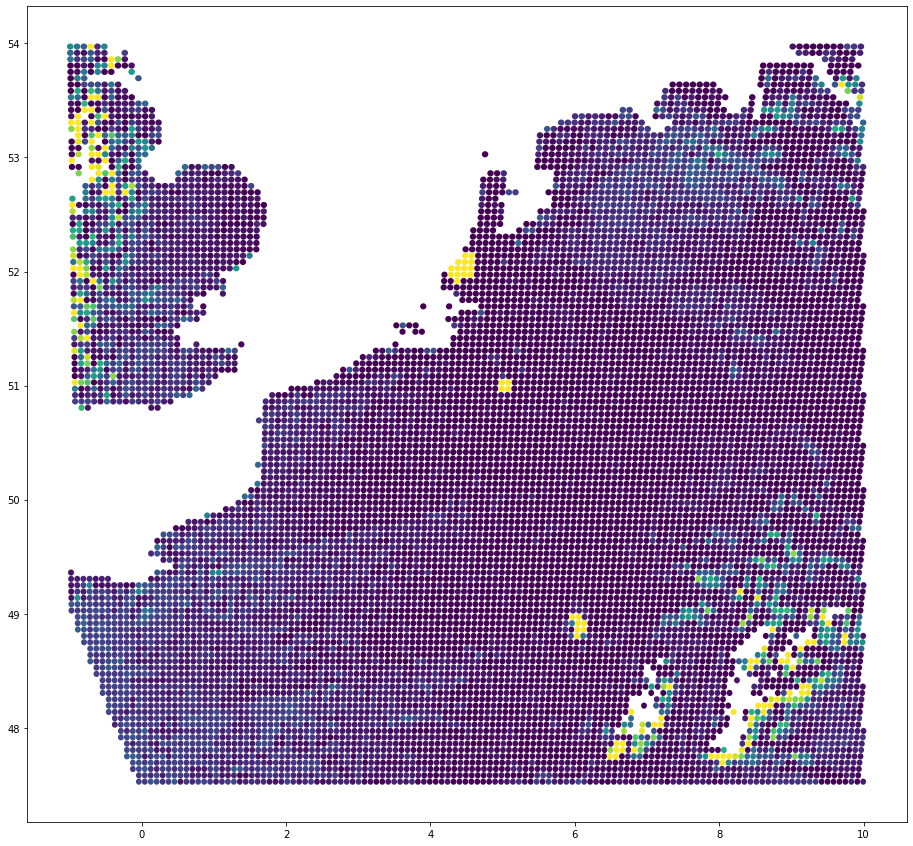

In [67]:
data.plot(column='oad', figsize=(20,15))


In [52]:
sql="""
    SELECT oad, ST_Intersection(
                polder3_l1b_bg1.geom, naturalearth.ne_10m_admin_1_states_provinces.geom
                )::geometry as geom
    FROM
            polder3_l1b_bg1, naturalearth.ne_10m_admin_1_states_provinces 
    WHERE
           name='Bremen'
    AND
            ST_Intersects(polder3_l1b_bg1.geom, naturalearth.ne_10m_admin_1_states_provinces.geom)
    """
oad = gpd.read_postgis(sql=sql, con=con)
con.commit()
oad.head()

,oad,geom
0,0.0100,"POLYGON ((8.63500 53.56032, 8.63336 53.56084, ..."
1,0.0100,"POLYGON ((8.62512 53.50364, 8.61992 53.50528, ..."
2,0.1250,"POLYGON ((8.60279 53.49047, 8.60376 53.49119, ..."
3,0.2797,"POLYGON ((8.51282 53.22557, 8.51156 53.22516, ..."
4,0.6472,"POLYGON ((8.49915 53.21997, 8.50221 53.21943, ..."


In [112]:
## base map
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sql="""
    SELECT *
    FROM
        naturalearth.ne_10m_admin_1_states_provinces
    WHERE
        iso_a2 LIKE '%DE%'
    """
data_background = gpd.read_postgis(sql=sql, con=con)
data_background.keys()

# Verden

Index(['ogc_fid', 'featurecla', 'scalerank', 'adm1_code', 'diss_me',
       'iso_3166_2', 'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       'name_local', 'type', 'type_en', 'code_local', 'code_hasc', 'note',
       'hasc_maybe', 'region', 'region_cod', 'provnum_ne', 'gadm_level',
       'check_me', 'datarank', 'abbrev', 'postal', 'area_sqkm', 'sameascity',
       'labelrank', 'name_len', 'mapcolor9', 'mapcolor13', 'fips', 'fips_alt',
       'woe_id', 'woe_label', 'woe_name', 'latitude', 'longitude', 'sov_a3',
       'adm0_a3', 'adm0_label', 'admin', 'geonunit', 'gu_a3', 'gn_id',
       'gn_name', 'gns_id', 'gns_name', 'gn_level', 'gn_region', 'gn_a1_code',
       'region_sub', 'sub_code', 'gns_level', 'gns_lang', 'gns_adm1',
       'gns_region', 'min_label', 'max_label', 'min_zoom', 'wikidataid',
       'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_

<AxesSubplot:>

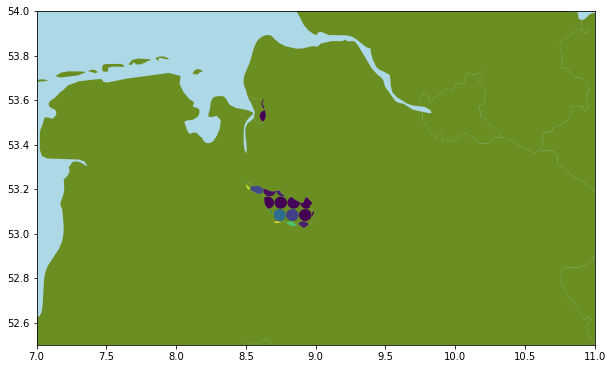

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.set_ylim([5.5, 54])
ax.set_xlim([7.0, 11])

ax.set(facecolor = "lightblue") #ocean
ax = oad.plot(column='oad', ax=ax, zorder=2)

data_background.plot(ax=ax, color="olivedrab", zorder=1) #land


# con.commit()